In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import  PCA
from yellowbrick.cluster import KElbowVisualizer


In [2]:

wine_df=pd.read_csv("winequality-red.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
wine_df.shape

(1599, 12)

In [25]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [27]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


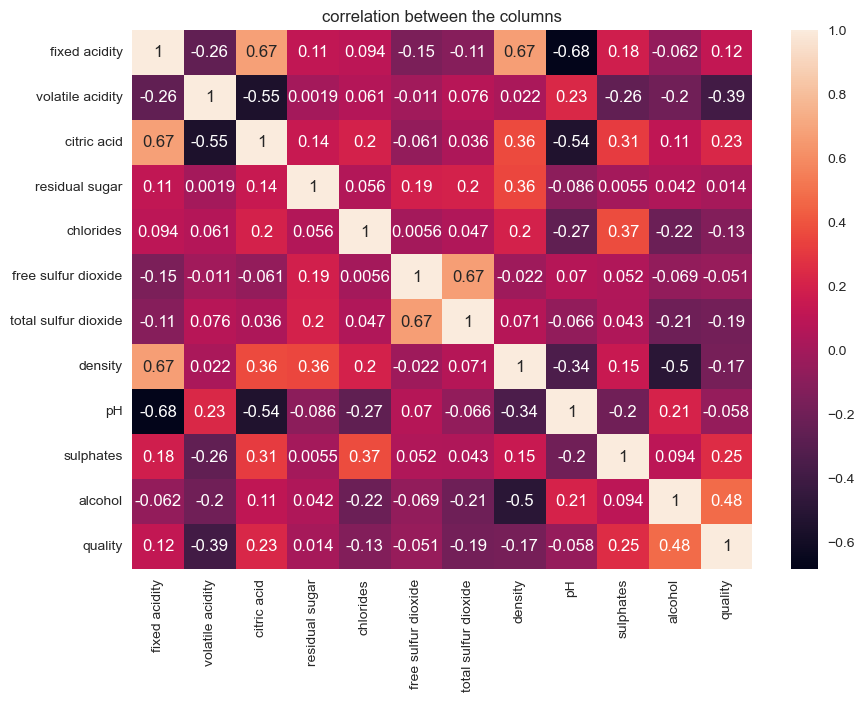

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(),annot=True)
plt.title('correlation between the columns')
plt.show()

In [29]:
wine_df=wine_df.drop('quality',axis=1)
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

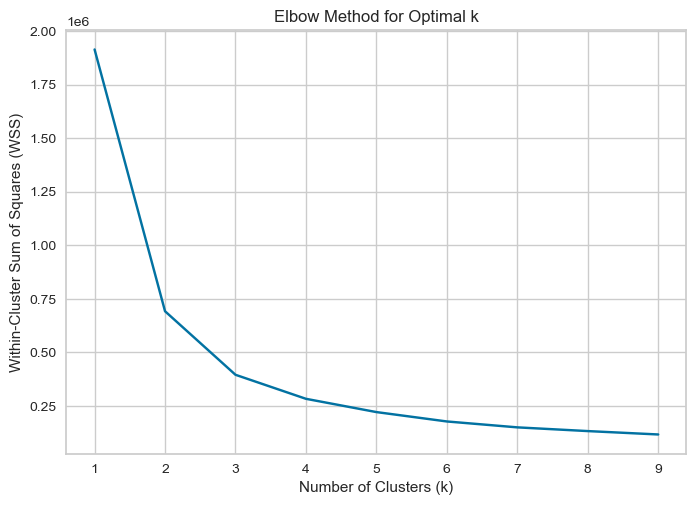

In [30]:
wss = []  # list to store the within-cluster sum of squares

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(wine_df)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 10), wss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.show()


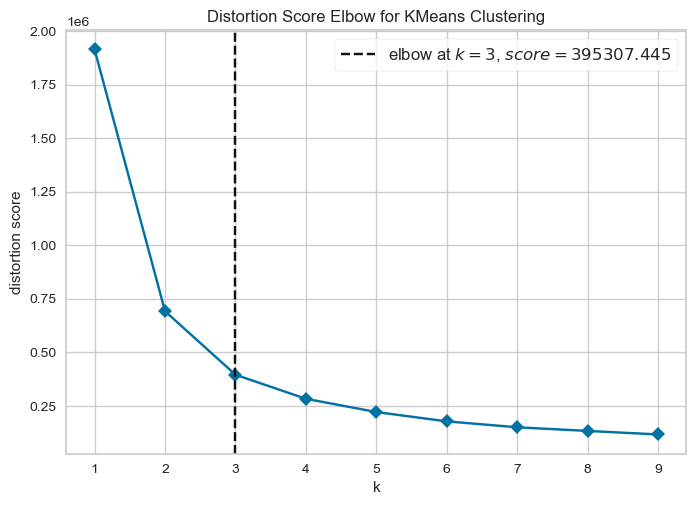

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)
visualizer.fit(wine_df)
visualizer.show()

In [34]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,max_iter=100)
    kmeans.fit(wine_df)
    score= silhouette_score(wine_df,kmeans.labels_)
    print("For cluster:{}, the silhouette score is: {}".format(i,score))
    

For cluster:2, the silhouette score is: 0.6034220347331241
For cluster:3, the silhouette score is: 0.5197446557038226
For cluster:4, the silhouette score is: 0.48617291416050135
For cluster:5, the silhouette score is: 0.44642187844374576
For cluster:6, the silhouette score is: 0.44850222651946337
For cluster:7, the silhouette score is: 0.3940373555812897
For cluster:8, the silhouette score is: 0.38907492139948696
For cluster:9, the silhouette score is: 0.3861890862120475


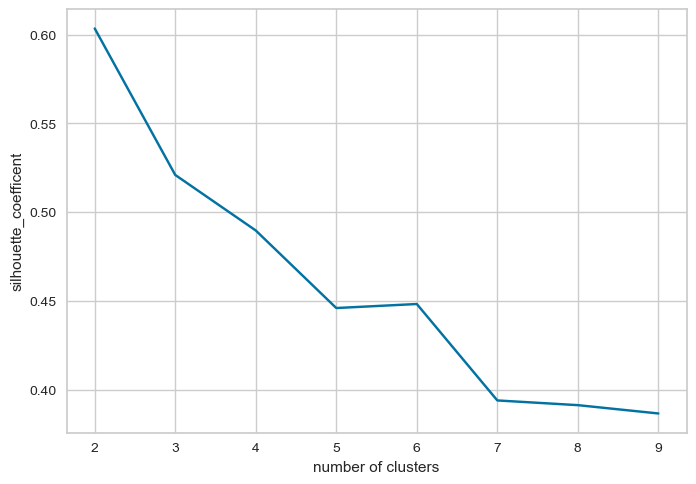

In [36]:
silhouette_coefficients=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,max_iter=100)
    kmeans.fit(wine_df)
    score=silhouette_score(wine_df,kmeans.labels_)
    silhouette_coefficients.append(score)
     
plt.plot(range(2,10),silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("silhouette_coefficent")
plt.show()     

In [7]:
pca=PCA()
X=pca.fit_transform(wine_df)

In [6]:
kmeans=KMeans(n_clusters=3)
label=kmeans.fit_predict(X)
unique_labels=np.unique(label)


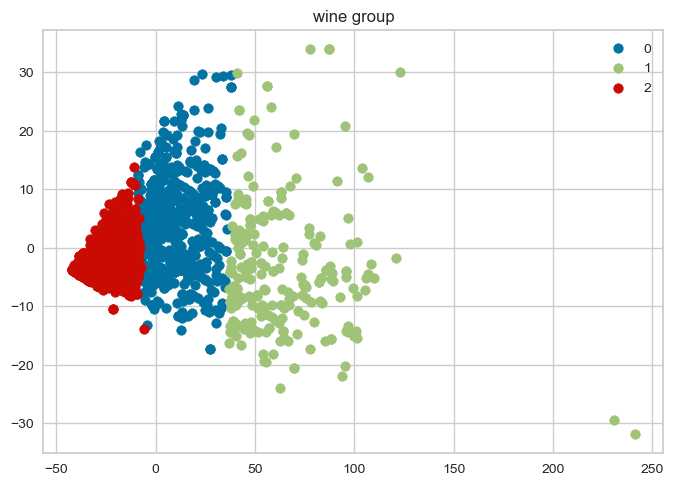

In [8]:
for i in unique_labels:
    plt.scatter(X[label==i,0],X[label==i,1],label=i)
    
plt.legend()
plt.title("wine group")
plt.show()    